In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter



In [45]:
df = pd.read_csv('who_suicide_statistics.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [46]:
df.head(1499)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
1494,Argentina,2015,male,15-24 years,656.0,3500580.0
1495,Argentina,2015,male,25-34 years,465.0,3289927.0
1496,Argentina,2015,male,35-54 years,633.0,5166179.0
1497,Argentina,2015,male,5-14 years,39.0,3672155.0


In [47]:
df.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [48]:
df["suicides_no"] = df["suicides_no"].fillna(0)

In [49]:
df.count()

country        43776
year           43776
sex            43776
age            43776
suicides_no    43776
population     38316
dtype: int64

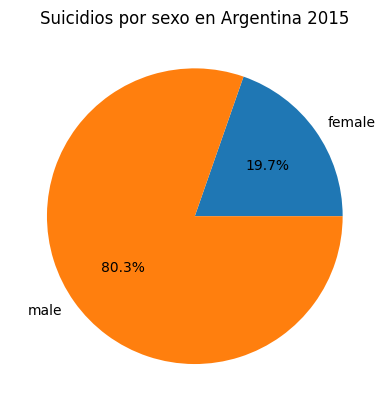

In [50]:
#Un gráfico circular de un solo año. Esto seria algo bueno
dato_2016 = df[(df['year']==2015) & (df['country']=='Argentina')].groupby('sex')['suicides_no'].sum()

plt.pie(
    dato_2016,                 # valores
    labels=dato_2016.index,    # etiquetas (M/F)
    autopct="%1.1f%%"        # mostrar porcentajes
)
plt.title("Suicidios por sexo en Argentina 2015")
plt.show()


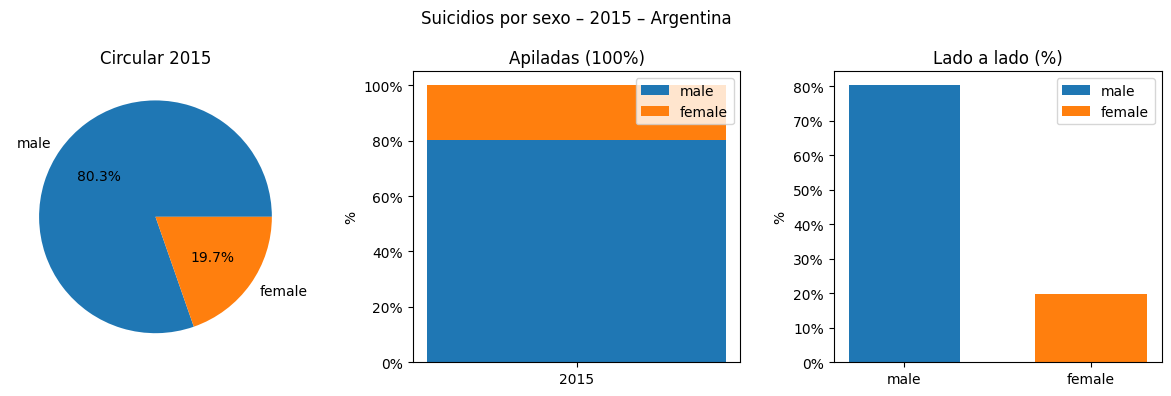

In [51]:
#comparacion, se ve la ventaja de uno sobre otro
anio = 2015
from matplotlib.ticker import PercentFormatter

anio = 2015
serie = (
    df[(df['year']==anio) & (df['country']== 'Argentina')]
    .groupby('sex')['suicides_no'].sum()
    .reindex(['male','female']).fillna(0)
)
total = serie.sum()
p = serie / total  # proporciones

fig, axes = plt.subplots(1, 3, figsize=(12,4))
# Pie (% ya lo muestra autopct)
axes[0].pie(p.values, labels=p.index, autopct='%1.1f%%')
axes[0].set_title(f'Circular {anio}')

# Barras apiladas 100%
axes[1].bar([0], [p['male']], label='male')
axes[1].bar([0], [p['female']], bottom=[p['male']], label='female')
axes[1].set_xticks([0]); axes[1].set_xticklabels([str(anio)])
axes[1].yaxis.set_major_formatter(PercentFormatter(1.0))
axes[1].set_ylabel('%'); axes[1].set_title('Apiladas (100%)'); axes[1].legend()

# Barras lado a lado en %
axes[2].bar([0], [p['male']], width=0.6, label='male')
axes[2].bar([1], [p['female']], width=0.6, label='female')
axes[2].set_xticks([0,1]); axes[2].set_xticklabels(['male','female'])
axes[2].yaxis.set_major_formatter(PercentFormatter(1.0))
axes[2].set_ylabel('%'); axes[2].set_title('Lado a lado (%)'); axes[2].legend()

plt.suptitle(f'Suicidios por sexo – {anio} – Argentina')
plt.tight_layout(); plt.show()


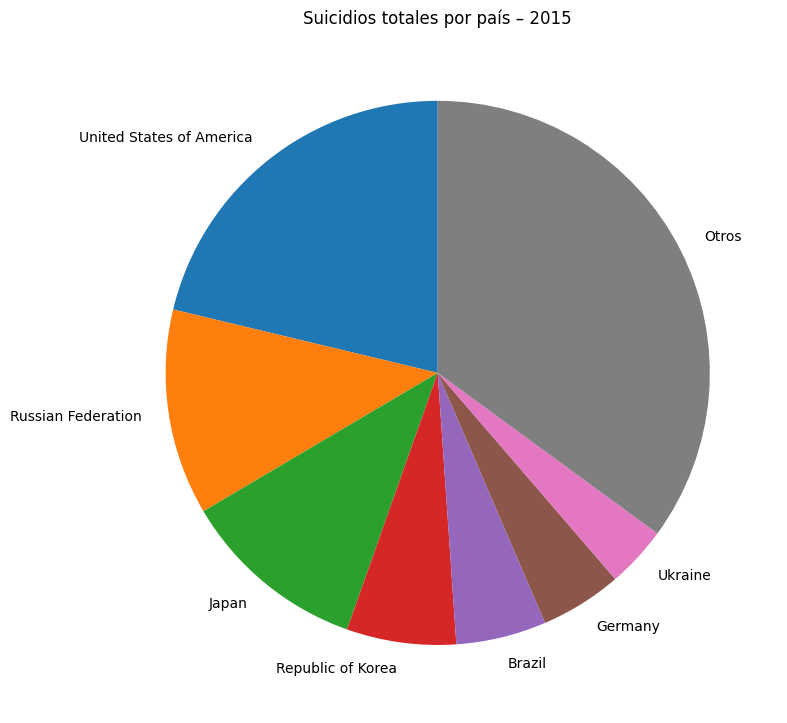

In [52]:


# 2) Tipos y limpieza mínima
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# 3) Filtrar 2015 y agregar por país
df2015 = df[df["year"] == 2015].copy()
totales = (
    df2015.groupby("country", as_index=True)["suicides_no"]
    .sum()
    .sort_values(ascending=False)
)
totales = totales[totales > 0]  # opcional: quitar países con 0

# 4) Pie chart (top 10 + 'Otros')
top_n = 7
top = totales.head(top_n)
otros = totales.iloc[top_n:].sum()

labels = list(top.index) + (["Otros"] if otros > 0 else [])
sizes = list(top.values) + ([otros] if otros > 0 else [])

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    #autopct=lambda p: f"{p:.1f}%\n({int(p*sum(sizes)/100):,})",
    startangle=90
)
plt.title("Suicidios totales por país – 2015")
plt.tight_layout()
plt.show()



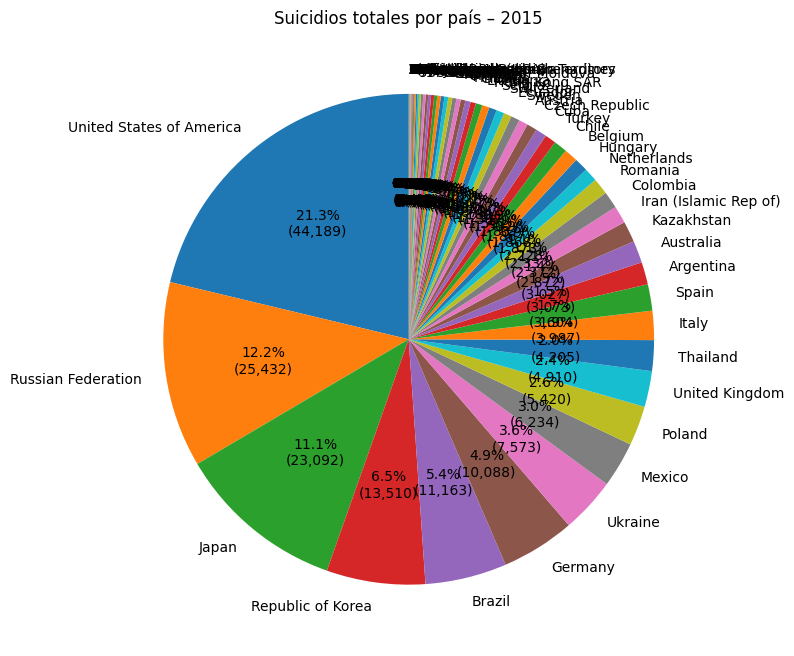

In [53]:
# 2) Tipos y limpieza mínima
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# 3) Filtrar 2015 y agregar por país
df2015 = df[df["year"] == 2015].copy()
totales = (
    df2015.groupby("country", as_index=True)["suicides_no"]
    .sum()
    .sort_values(ascending=False)
)
totales = totales[totales > 0]  # opcional: quitar países con 0

# 4) Pie chart (top 10 + 'Otros')
top_n = 10
top = totales.head(top_n)
otros = totales.iloc[top_n:].sum()

labels = totales.index.tolist()
sizes = totales.values.tolist()

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f"{p:.1f}%\n({int(p*sum(sizes)/100):,})",
    startangle=90
)
plt.title("Suicidios totales por país – 2015")
plt.tight_layout()
plt.show()



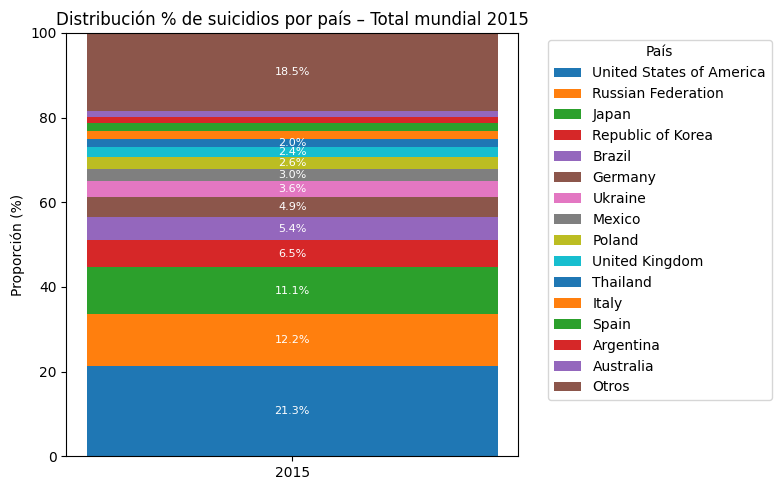

In [54]:
# 2) Limpieza mínima
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# 3) Filtrar 2015 y sumar suicidios por país
df2015 = df[df["year"] == 2015].copy()
totales = df2015.groupby("country")["suicides_no"].sum().sort_values(ascending=False)

# 4) Calcular proporciones (cada país como % del total)
prop = totales / totales.sum()

# (Opcional) quedarnos con los 15 países principales y agrupar el resto en "Otros"
top_n = 15
top = prop.head(top_n)
otros = prop.iloc[top_n:].sum()
if otros > 0:
    top["Otros"] = otros

# 5) Graficar barra única apilada
fig, ax = plt.subplots(figsize=(8, 5))

bottom = 0
for pais, valor in top.items():
    ax.bar("2015", valor*100, bottom=bottom, label=pais)  # multiplicamos por 100
    # anotar el porcentaje en el centro de cada segmento (si es significativo)
    if valor > 0.02:  # solo si >2%
        ax.text("2015", bottom + (valor*100)/2, f"{valor*100:.1f}%", 
                ha="center", va="center", color="white", fontsize=8)
    bottom += valor*100

ax.set_ylim(0, 100)  # de 0 a 100%
ax.set_ylabel("Proporción (%)")
ax.set_title("Distribución % de suicidios por país – Total mundial 2015")
ax.legend(title="País", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

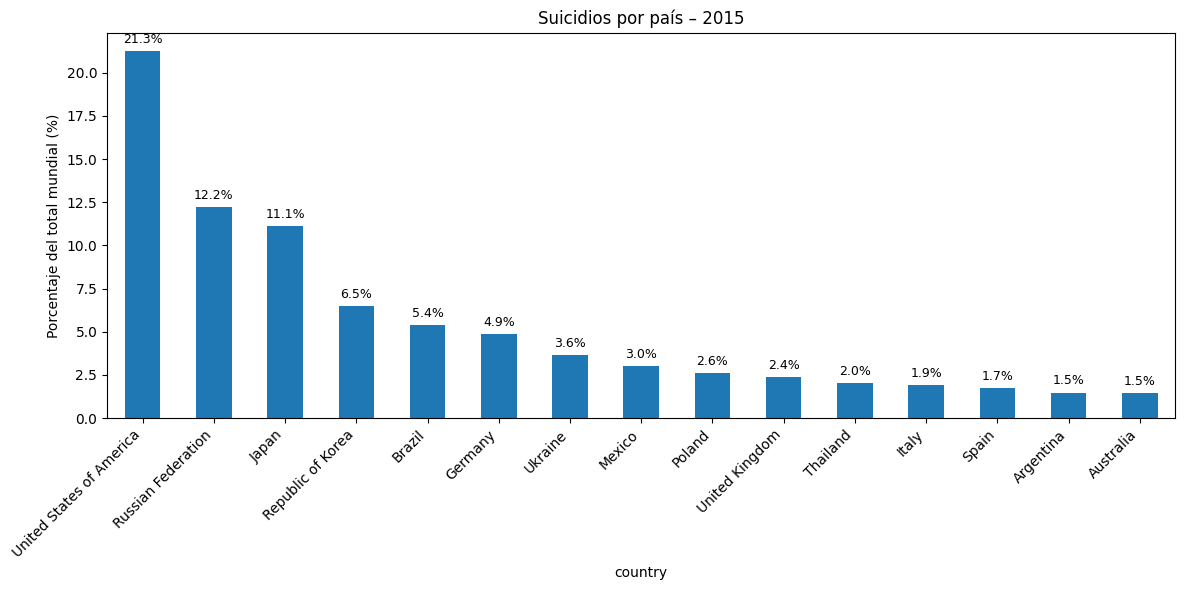

In [55]:
#El porcentaje no suma 100% 
# 2) Limpieza mínima
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# 3) Filtrar 2015 y sumar por país
df2015 = df[df["year"] == 2015].copy()
totales = df2015.groupby("country")["suicides_no"].sum().sort_values(ascending=False)

# 4) Convertir a porcentaje del total mundial
prop = totales / totales.sum() * 100

# 5) Seleccionar top 15 países
top15 = prop.head(15)

# 6) Gráfico de barras (en %)
plt.figure(figsize=(12,6))
top15.plot(kind="bar")
plt.ylabel("Porcentaje del total mundial (%)")
plt.title("Suicidios por país – 2015")
plt.xticks(rotation=45, ha="right")

# anotar los porcentajes sobre cada barra
for i, v in enumerate(top15):
    plt.text(i, v + 0.3, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

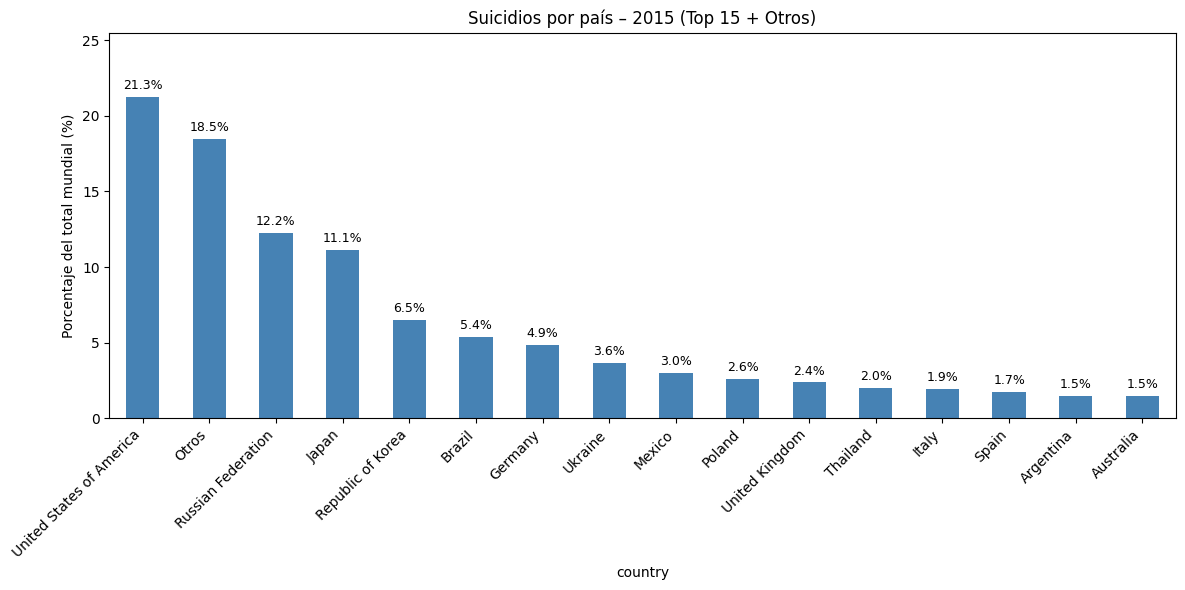

In [56]:
# 2) Limpieza mínima
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# 3) Filtrar 2015 y sumar por país
df2015 = df[df["year"] == 2015].copy()
totales = df2015.groupby("country")["suicides_no"].sum().sort_values(ascending=False)

# 4) Convertir a porcentaje del total mundial
prop = totales / totales.sum() * 100

# 5) Top N y “Otros”
top_n = 15
top = prop.head(top_n).copy()
otros = 100 - top.sum()
if otros > 0.0001:
    top.loc["Otros"] = max(0.0, otros)

# 🔑 Reordenar de mayor a menor, incluyendo “Otros”
top = top.sort_values(ascending=False)

# 6) Gráfico de barras
plt.figure(figsize=(12,6))
ax = top.plot(kind="bar", color="steelblue")

ax.set_ylabel("Porcentaje del total mundial (%)")
ax.set_title("Suicidios por país – 2015 (Top 15 + Otros)")
plt.xticks(rotation=45, ha="right")

# Anotar los porcentajes
for i, v in enumerate(top.values):
    ax.text(i, v + top.max()*0.015, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)

ax.set_ylim(0, top.max()*1.2)
plt.tight_layout()
plt.show()


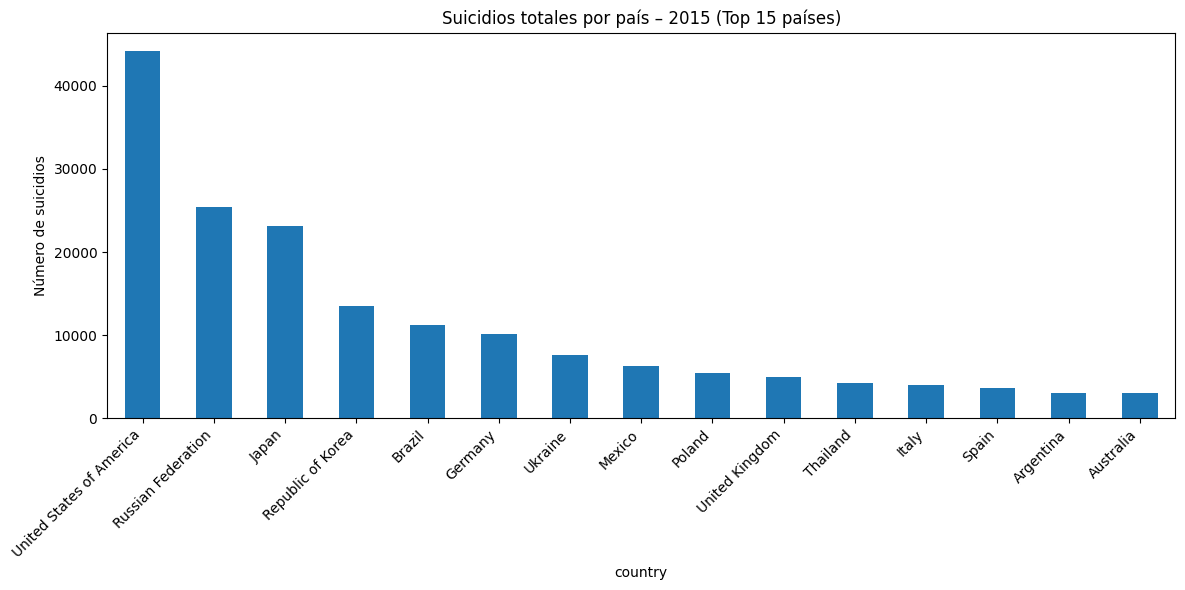

In [57]:

# 2) Tipos y limpieza mínima
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# 3) Filtrar 2015 y sumar H+M por país
df2015 = df[df["year"] == 2015].copy()
totales = (
    df2015.groupby("country")["suicides_no"]
    .sum()
    .sort_values(ascending=False)
)

# 4) Tomar top 15 países
top = totales.head(15)

# 5) Gráfico de barras
plt.figure(figsize=(12,6))
top.plot(kind="bar")
plt.ylabel("Número de suicidios")
plt.title("Suicidios totales por país – 2015 (Top 15 países)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [58]:
df.columns = df.columns.str.strip().str.lower()
df["country"] = df["country"].astype(str).str.strip()

# filtrar solo Argentina
arg = df[df["country"].str.casefold() == "argentina"].copy()

print(arg)

        country  year     sex          age  suicides_no  population
1056  Argentina  1979  female  15-24 years        105.0   2343000.0
1057  Argentina  1979  female  25-34 years         95.0   1951000.0
1058  Argentina  1979  female  35-54 years        136.0   3295000.0
1059  Argentina  1979  female   5-14 years         15.0   2517000.0
1060  Argentina  1979  female  55-74 years        124.0   2026000.0
...         ...   ...     ...          ...          ...         ...
1495  Argentina  2015    male  25-34 years        465.0   3289927.0
1496  Argentina  2015    male  35-54 years        633.0   5166179.0
1497  Argentina  2015    male   5-14 years         39.0   3672155.0
1498  Argentina  2015    male  55-74 years        431.0   3011963.0
1499  Argentina  2015    male    75+ years        245.0    712691.0

[444 rows x 6 columns]


C:\Users\vicen\AppData\Local\Temp\ipykernel_20116\119048381.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = (dfa.groupby(["year", "age"])["suicides_no"]


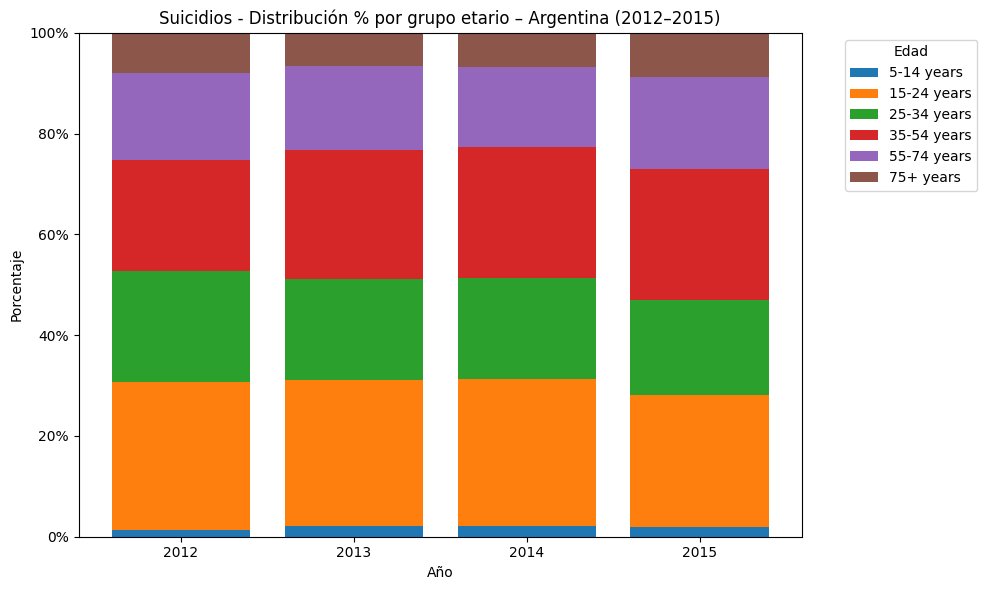

In [59]:
# --- limpieza (igual que tenías) ---
df.columns = df.columns.str.strip().str.lower()
df["country"] = df["country"].astype(str).str.strip()
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# --- filtrar Argentina 2012–2015 ---
dfa = df[(df["country"] == "Argentina") & (df["year"].between(2012, 2015))].copy()

# --- ordenar categorías de edad (menor -> mayor) ---
age_order = ["5-14 years", "15-24 years", "25-34 years",
             "35-54 years", "55-74 years", "75+ years"]
dfa["age"] = pd.Categorical(dfa["age"], categories=age_order, ordered=True)

# --- agrupar por año y edad (años ascendentes, edades en el orden fijado) ---
tabla = (dfa.groupby(["year", "age"])["suicides_no"]
           .sum()
           .unstack(fill_value=0)
           .reindex(columns=age_order)         # asegura el orden de columnas
           .sort_index())                       # 2012, 2013, 2014, 2015

# --- convertir a proporciones (cada año = 100%) ---
prop = tabla.div(tabla.sum(axis=1), axis=0)

# --- gráfico: barras apiladas por año ---
fig, ax = plt.subplots(figsize=(10,6))
bottom = np.zeros(len(prop))
x = prop.index.astype(str)

for col in prop.columns:
    ax.bar(x, prop[col].values, bottom=bottom, label=col)
    bottom += prop[col].values

ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_ylabel("Porcentaje")
ax.set_xlabel("Año")
ax.set_title("Suicidios - Distribución % por grupo etario – Argentina (2012–2015)")
ax.legend(title="Edad", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

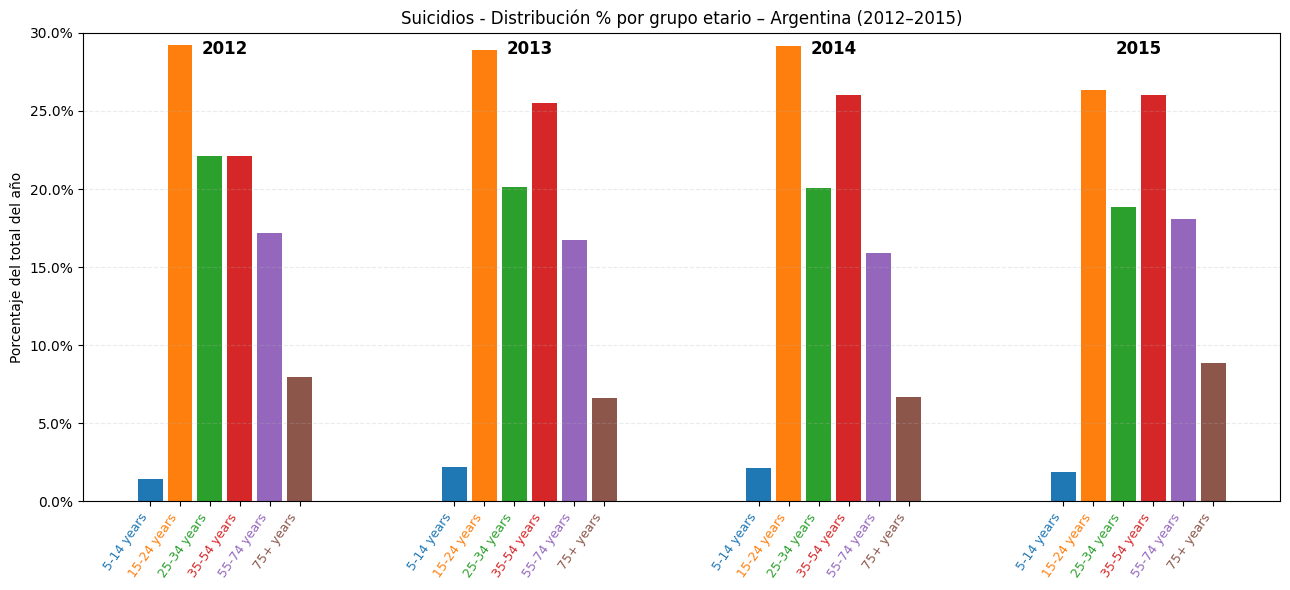

In [60]:
# --- usa tu DataFrame 'prop' ya calculado ---
prop = prop.loc[2012:2015]   # si querés solo 2012–2015

years = prop.index.to_numpy()
ages  = prop.columns.to_list()
vals  = prop.to_numpy()

nY, nA = len(years), len(ages)

# --- parámetros de layout ---
bar_step   = 0.12        # separación centro a centro
inner_gap  = 0.02        # 👉 espacio visible entre barras (ajustar 0.015–0.03)
bar_width  = bar_step - inner_gap
group_gap  = 0.50        # separación entre grupos (años)
group_w    = nA * bar_step
centers    = np.arange(nY) * (group_w + group_gap)

colors = ["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd","#8c564b"]

fig, ax = plt.subplots(figsize=(13,6))

# --- dibujar barras con espacio interno ---
for j, age in enumerate(ages):
    xj = centers + (j - (nA-1)/2) * bar_step
    ax.bar(xj, vals[:, j], width=bar_width, color=colors[j], edgecolor="none")

# --- eje Y ---
ax.set_ylim(0, 0.30)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.grid(axis="y", linestyle="--", alpha=0.25)
ax.grid(axis="x", visible=False)

ax.set_ylabel("Porcentaje del total del año")
ax.set_title("Suicidios - Distribución % por grupo etario – Argentina (2012–2015)")

# --- etiquetas de edad abajo, inclinadas y coloreadas ---
xticks, xlabels, xcols = [], [], []
for c in centers:
    for j, age in enumerate(ages):
        xticks.append(c + (j - (nA-1)/2) * bar_step)
        xlabels.append(age)
        xcols.append(colors[j])

ax.set_xticks(xticks)
ax.set_xticklabels(xlabels, rotation=55, ha="right")
for lbl, col in zip(ax.get_xticklabels(), xcols):
    lbl.set_color(col)
    lbl.set_fontsize(9)

# --- años dentro del cuadro, arriba de cada bloque ---
y_top = ax.get_ylim()[1] * 0.985
for c, y in zip(centers, years):
    ax.text(c, y_top, str(y), ha="center", va="top",
            fontsize=12, fontweight="bold")

plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.show()


In [61]:
df.columns = df.columns.str.strip().str.lower()

df["sex"] = df["sex"].astype(str).str.strip().str.lower()
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# filtrar 2015 y agrupar por sexo
totales_2015 = (
    df[df["year"]==2015]
    .groupby("sex")["suicides_no"]
    .sum()
)

print("Totales de suicidios por sexo en 2015:")
print(totales_2015)

Totales de suicidios por sexo en 2015:
sex
female     48526.0
male      159382.0
Name: suicides_no, dtype: float64
